# Decision Trees
**Notebook 1 of 3**

In this tutorial we will look at how the Decision Tree algorithm works to make predictions. We will look at data about the Iris flower, a genus of about 300 species of plants in the family Iridaceae, that is very polpular in gardens accross global temperature zones. These are many species of plants that would take a long time to manually identify, so we want to create a model that can help us predict which class of iris the flower belongs to based on its features.

To be able to do this prediction, we need data on the various classes of the iris and its key features. Fortunately, there are a lot of datasets for this purpose. We will access Open Data sources, verify the data for structure and consistency, and clean up any spelling or formatting errors that would impair a computing process, and enrich the data with any additional values that you need to produce accurate results.

For actually using the data we use simple Machine Learning models known as Decision Trees which can make predictions of output data based on previously unseen input data.  They work by splitting the data into groups like splitting a population based on hair colour, favourite food, favourite subject and so on creating a tree structure.  When new input data is passed to the model, the decision tree places it in the right group to preduct an outcome.  We will then expand on the notion to the Random Forest model which is made up a several trees on different chunks of data and vote on the answer to get more accurate predictions.

But where do we get our data? The University of California Irvine's Open Data website has a small data sets suitable to get our training data and test data. We have already downloaded the datasets and you can find them in the tutorial repository.


# Learning objectives
Average time to complete 30min

By the end of this tutorial you should be able to:
* Clean your data and describe why this is important for machine learning.
* Combine data sets.
* Remove outliers and unneeded data.
* Filling out the missing data, if needed.
* Visualize and analyze data to gain lots of insights into the data.
* Make the decision tree classifier.
* Make prediction with the decision tree classifier.
* Visualize how clearly the decision tree model distinguishes the iris classes using decision boundaries.


## What you will need for this tutorial

* See the [introduction document](https://uottawa-it-research-teaching.github.io/machinelearning/) for general requirements and how Jupyter notebooks work.
* We'll need Pandas for convenient data handling. It's a very powerful Python package that can read CSV and Excel files. It also has very good data manipulation capabilities which come in use for data cleaning.
* We will use scikit learn as our machine learning package.
* numpy 
* seaborn 
* matplotlib
* requests
* ipywidgets
* The data files that should have come with this notebook.

## RDM best practices

Good data handling for machine learning begins with good Research Data Managment (RDM). The quality of your source data will impact the outcome of your results, just like the reproducibility of your results will depend on the quality of your data sources, in addition to how you organize the data so that other people (and machines!) can understand and reuse it.

We also need to respect a few research data management best practices along the way, these best practices are recommended by the Digital Research Alliance of Canada. In the first tutorial we encouraged you to resepct two RDM best practices:

* SAVE YOUR RAW DATA IN ORIGINAL FORMAT<br>
* BACKUP YOUR DATA (3-2-1 rule)<br>

These practices should apply in this tutorial as well, but we will also look at best practices of data description, documentation and file naming that will streamline your data processing and project management. 

DESCRIBE YOUR DATA

* Machine Friendly: Describe your dataset with a metadata standard for discovery.
* Human Friendly: Describe your variables, so your colleagues will understand what you meant. Data without good metadata is useless. Give your variables clear names.
* Do not leave cells blank -use numeric values clearly out of range to define missing (e.g. '99999') or not applicable (e.g. '88888') data anddescribe these in your data dictionary.
* Convert your data to open, non-proprietary formats 
* Name your files well with basic meta-data in the file names


## Cleaning your data

We will use Pandas library for our data cleaning since it has veryful power filtering and manipulation tools to get our data formatted to allow for easy analysis. When you use data from other sources the data cleaning process can be time consuming, but it is an important step to ensure that your results are accurate. 

In [1]:
# Depending where you are running the code, you may need to install the libraries.
# You can check if the libraries are installed by running !pip list in a cell.
# !pip install sklearn numpy pandas seaborn matplotlib requests ipywidgets

In [2]:
# These Python libraries need to be installed and imported in the environment
import warnings;
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

We will look at data about the iris flower. We want to predict which species an iris flower belongs to by inputting measurements of the sepal and petal. For a machine learning algorithm, the species will represent the class that the data belongs.

To be able to do this, we need data from various species of the iris flowers and key measurements that we believe to be unique to them. Fortunately, there are a lot of datasets for this purpose. The University of California Irvine's Open Data website has a small data sets suitable to get our training data and test data. Their [Open Data website](https://archive.ics.uci.edu/dataset/53/iris) is very helpful.

#### iris data

The very first step in data cleaning, is reading the data! Make sure you have "data.csv" that should have come with this notebook. If you don't have it, you can download it from the link in the comment below.

In [3]:
# https://archive.ics.uci.edu/dataset/53/iris
# load the url
url = './data.csv'
dataset = pd.read_csv(url)

Let's take a first hand look at the dataset to make sure the data can be use within our notebook. 

The following pictures show the parts of the iris species that were measured.
![iris](iris_species.jpg)

The data has now been read by Pandas and stored in the variable dataset so we can now use it in our notebook.
Let's see that we have

In [4]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


This data set also follows good RDM practices because the variables of each column are clearly named: The sepal and the petal are two distinct parts to the Iris flower. In this data set structure, sepal length and width are easily understood by a human who has adequate horticultural knowledge to be distinct from the petal length and width, and that all of these data points are necessary to classify the flower as a species of the Iridecae family. Therefore, even if we didn't collect this data ourselves by measuring hundreds of Iris flowers, you can still reuse it with ease.

Since we only want to get a cursory look at the data at this stage, an alternated way to present the data is to just look at the first five rows of data

In [5]:
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's take a further look.

In [6]:
# Data types in the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The column names are easily understandable and follow good RDM best practices. This clear documentation of the variables as they correspond to the data collection process helps us to reuse this data!

The summary explains that these columns represent measurements of the iris flowers that data was collected on. 

*Non-null* values are the number of flowers that were measured and classified by their species.<br>
*float64* values indicate double precision 64-bit decimal point number meaning they can take very large or small numbers.<br>
*object* values indicate that the variable contains categorical or textual data rather than numerical.<br>

Notice that we have 150 entries (one for each iris flower), and if we look at the measurements, we see we have 150 non-null values. *This indicates no missing data!*. We also notice that the datatypes for the measurements are all numerical and the same datatype (float64).  This is important since performing math functions can only work with numerical data. The species is textual which is what we expect.

Note that missing data is fairly typical for raw datasets.

Fortunately, we don't have to deal with missing data here.  Visualization is a powerful tool to check the data because it lets you see at a glance if anything weird might be going on.

This requires some level of understanding of the data you are working with. For complicated datasets, visualizations can be quite difficult and would require some domain expertise, but it pays off to visualize because of the insights that it can bring.

In this case, we are measuring petal and sepal lengths and widths, so no expertise required in this case! Let's plot some of the data.


In [7]:
# numerical summary, only applies to numerical columns
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Next, let's analyze the data. 
Pandas has a lot of useful functions called **methods for data exploration**.  The .describe() function generates descriptive statistics of a DataFrame or a Series of numeric values.  This function generates summary statistics for numeric columns, including count, mand, stadard deviation, minimum, 35th percentile, 50th percentile (median), 75th percentile, and maximum. It is useful because it helps identify anomailies in the data.

Machine Learning models work best when data is evenly distributed as on a Normal Bell curve.  That's in an ideal world.  We want an idea as to how "uneven" the data is.
We know that the dataset is small (150 data points).  Using the mean is a always good metric to start with to evaluate if the decisions made by the model are reliable.  When we get into larger datasets (1,000s, 100,000s points), you will want to look at the distribution metrics. Based on the mean, we observe that there are no extreme outliers that could indicate the dataset deviating greatly from a Normal distribution.  

In [8]:
# number of instances in each class
dataset.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

We looked at the numerical distribution and saw that there are no anomalies to note. Let's look at how the textual distribution is split in the dataset.  We know that there are 3 species of iris: setosa, versocolor and virginica.  Let's see how many rows for each one we have.

Our 150 rows dataset is divided in 50, 50 and 50 split among species so that tells us that all the data is evenly divided with regards to the species.

In [10]:
# Break out out a traing and a test set
train, test = train_test_split(dataset, test_size = 0.3, stratify = dataset['species'], random_state = 42)

So now we need to get ready the decision tree classifier we are building. The train_test_split function allows you to break out your data in a training set and a test set.  This function randomly splits the dataset into a training portion and a test portion.  The training portion is what we use to train the classifer on.  The test portion is what we use to validate the classifier once it is trained. Commonly, a good place to start is with 70%/30% split in this case.

In [11]:
# number of instances in each class in training data
train.groupby('species').size()
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 98 to 3
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  105 non-null    float64
 1   sepal_width   105 non-null    float64
 2   petal_length  105 non-null    float64
 3   petal_width   105 non-null    float64
 4   species       105 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.9+ KB


Let's see what we've got the training set.

Taking a look at the training set reveals the 105 entries that represents 70% of the total. The training data is made up of the 4 numerical measurements (petal, sepal lenght and width) and 1 text value representing the species.  The integrity of the data we will train seems to have been maintained. Let's take a look at the histograms to get more insight into the training set.

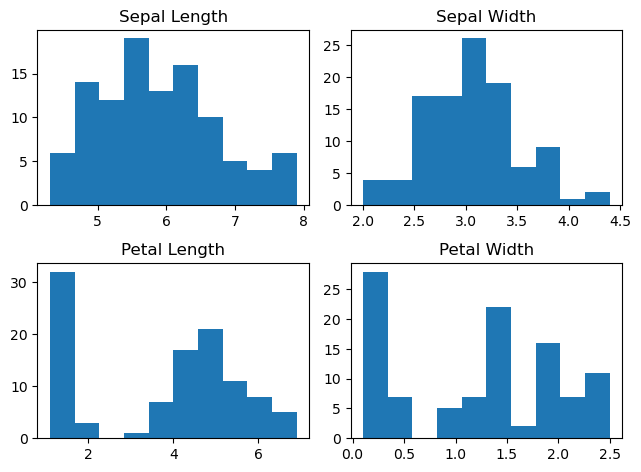

In [12]:
# histograms
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

#Comment: Why do we need to add some spacing between plots. Please explain.

# add some spacing between subplots
fig.tight_layout(pad=1.0);

Hmm. If you look at the data. you can see that the sepal length and the sepal width are almost a perfect Normal distribution. The petal length and width however aren't so much normally distributed. That's a sign that the petal's measured properties will likely be a deciding factor about what species (class) an iris flower belongs to.  In a clean dataset, its the data with most discontinuity and disparity that tend to become higher deciding factors in classifiers. We will explore that further in notebook 2 when we see Random Forest classifiers.

In [13]:
# boxplots using seaborn
#fig, axs = plt.subplots(2, 2)
#fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
#cn = ['setosa', 'versicolor', 'virginica']
#sns.boxplot(x = 'species', y = 'sepal_length', data = train, order = cn, ax = axs[0,0]);
#sns.boxplot(x = 'species', y = 'sepal_width', data = train, order = cn, ax = axs[0,1]);
#sns.boxplot(x = 'species', y = 'petal_length', data = train, order = cn, ax = axs[1,0]);
#sns.boxplot(x = 'species', y = 'petal_width', data = train,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
#fig.tight_layout(pad=1.0);

Knowing that the petal measurements are of most interest in deciding which species an iris flower belongs, let's focus more on the influence of the petal features.  To do this, we analyze further by overlaying the normal density plots.  

We see from the plots that the petal width/length can most distinguish Setosa species from the others species of the iris. Petal width being the greatest differentiator of the Versicolor and Virginica.  These are important observations as we will elaborate more on this coming up.

On the plots, the X axis represent the measured lengths and the Y axis represents the proportion of observations (probability) expected to occis within that y value.

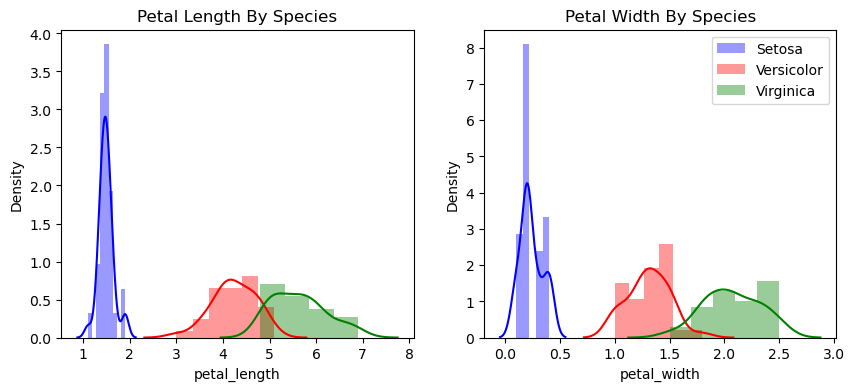

In [14]:
# We see that petal length/width can separate setosa from the others
# histogram by species
setosa_pl = train.loc[train.species=='setosa', 'petal_length']
versicolor_pl = train.loc[train.species=='versicolor', 'petal_length']
virginica_pl = train.loc[train.species=='virginica', 'petal_length']
setosa_pw = train.loc[train.species=='setosa', 'petal_width']
versicolor_pw = train.loc[train.species=='versicolor', 'petal_width']
virginica_pw = train.loc[train.species=='virginica', 'petal_width']

fig, axs = plt.subplots(1, 2)
# set figure size
fig.set_size_inches(10,4)
ax1 = sns.distplot(setosa_pl, color="blue", label="Setosa", ax = axs[0]);

ax1.set_title('Petal Length By Species')
ax1 = sns.distplot(versicolor_pl, color="red", label="Versicolor", ax = axs[0]);
ax1 = sns.distplot(virginica_pl, color="green", label="Virginica", ax = axs[0]);

ax2 = sns.distplot(setosa_pw, color="blue", label="Setosa", ax = axs[1]);
ax2.set_title('Petal Width By Species')
ax2 = sns.distplot(versicolor_pw, color="red", label="Versicolor", ax = axs[1]);
ax2 = sns.distplot(virginica_pw, color="green", label="Virginica", ax = axs[1]);

plt.legend();

Let's look at classification patterns using bivariate analysis. When the data set contains two or more variables and researchers aim to undertake comparisons between the two data set then bivariate analysis is the right type of analysis technique. It involves exploring and describing the relationship between two variables and how they are associated with each other.  When we have 3 or more valiable such as this dataset, bivariate analysis helps identify variables most strongly related and worthy of more rigorous relationship understanding.

And we see here where Satosa is clearly separated from the other species.  Satosa species will be the easiest species for the decision tree to predict

Virginica and Versicolor species have some overlap especially for the charts involving sepal measurements. But how big of a challenge am I going to have to distingush these 2?  We notice that only when the petal measurements are included can those two species be distinguished.


<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 98 to 3
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  105 non-null    float64
 1   sepal_width   105 non-null    float64
 2   petal_length  105 non-null    float64
 3   petal_width   105 non-null    float64
 4   species       105 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.9+ KB


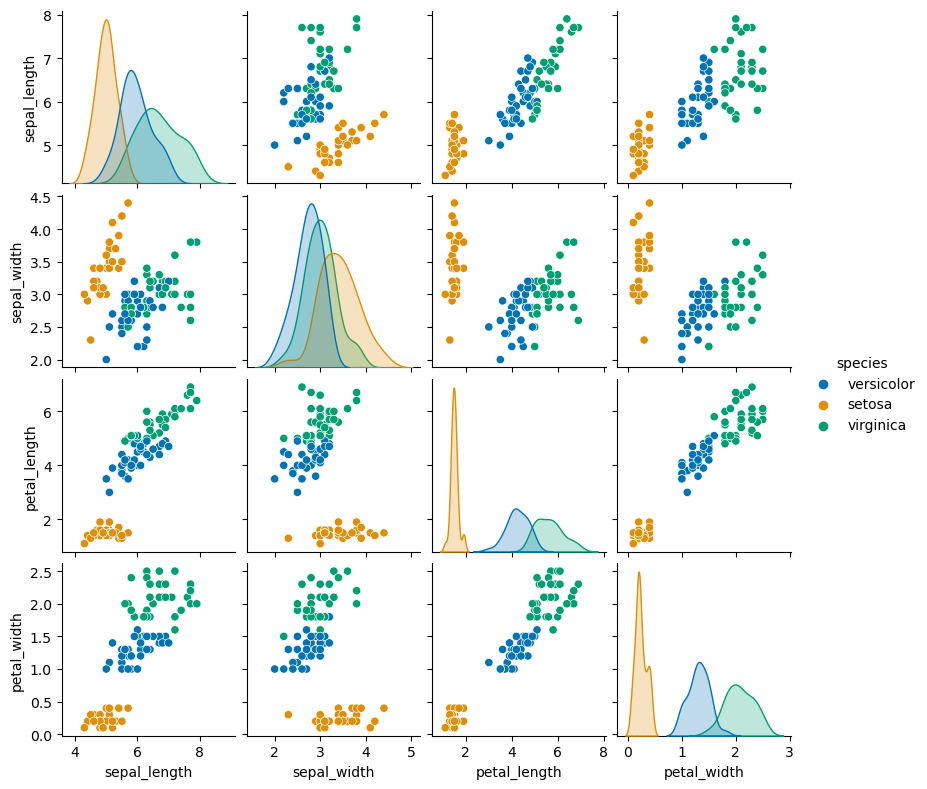

In [15]:
# bivariate relationship
# scatterplot matrix
train.info()
sns.pairplot(train, hue="species", height = 2, palette = 'colorblind');

Correlation is also always a good place to look at to get some ideas about your data set. What we are really looking for here is to find convincing information that the features are fairly independent of each other. Highly correlated variables provide reducdant information to the decision tree classifer.  This is true for all classifiers.  Having multiplt correlated predictor variable can decrease classifier model performance and interpretability.  We see below that the sepal length is highly correlated with the petal measurements.  The sepal length will be contributing the most to the model's error.

Since we are more interested in the different classes, the pair plots are far more revealing.

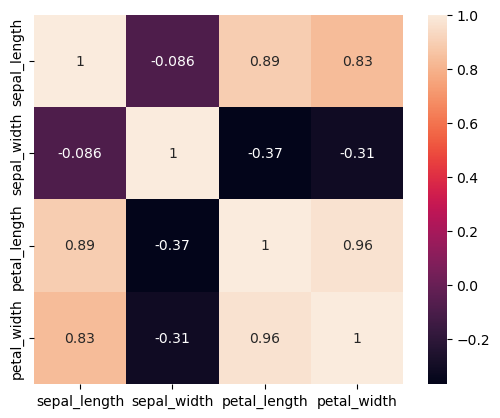

In [16]:
# correlation matrix
corrmat = train.corr(numeric_only=True)
sns.heatmap(corrmat, annot = True, square = True);

To use the classifier, we have to create our training data and test data variables.

For the training data, we have<br>
    - X variables (model inputs): sepal_length, sepal_width, petal_length, petal_width<br>
    - Y variable (model ouput): species
    
For the test data, we have<br>
    - X variables (model inputs): sepal_length, sepal_width, petal_length, petal_width<br>
    - Y variable (model ouput): species

In [18]:
# Model development - train
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species

# Model development - test
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

### Decision Tree Classifier

Decision Tree classifiers are functions in sklearn that we can use to set up a Decision Tree model.
Let's set up our first decision tree classifer with the training variables from above: X_train and y_train.
This decision tree will have a depth of 3 meaning 3 layers.

In [19]:
# first try decision tree
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

Let's run the classifier on our test set to generate the predictions.  Sklearn classifiers have a built-in accuracy calculator that compares the predictions with the known true values from the test set y_test variable.

In [20]:
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(y_test, prediction)))

The accuracy of the Decision Tree is 0.933


93.3%  That's quite good for most applications.  Let's look at the decision tree in more depth ...

In [21]:
mod_dt.feature_importances_

array([0.      , 0.      , 0.041423, 0.958577])

Time to plot our Decision Tree. 

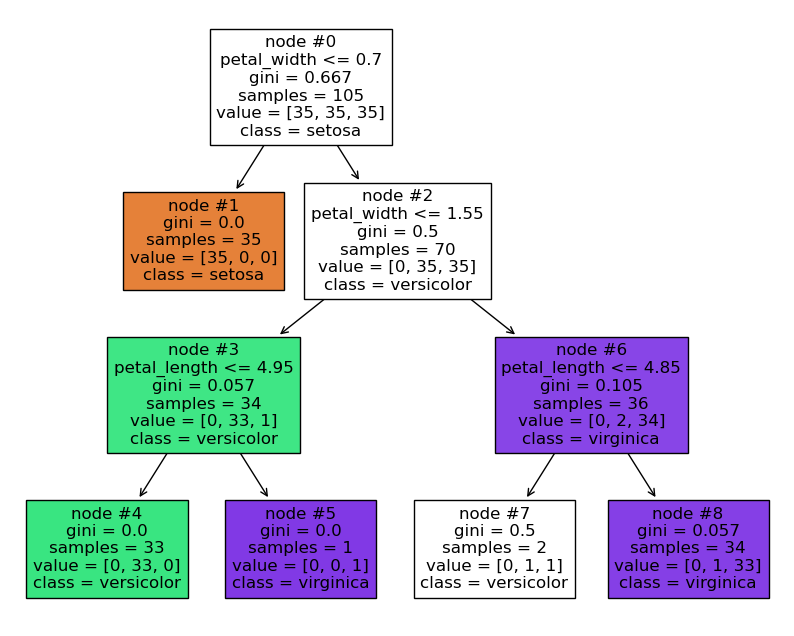

In [22]:
# set figure size
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True, label = 'all', node_ids = True);

### Understanding a Decision Tree - Nodes

<b> Root node (node #0):</b>  It represents the entire population or sample and this further gets divided into two or more homogeneous sets.

<b>Decision node (nodes #2, #3, #6):</b> Largest decrease in the impurity metric compared to the parent node. This is the optimal split.

<b>Leaf nodes (nodes #1, #4, #5, #7, #8):</b> They represent final outcome. Common criteria are max tree depth, min samples at a node, or no improvement in impurity.


### Understanding a Decision Tree – Node Info
**A node's value** attribute tells you how many training instances of each class this node applies to.  For example, the bottom right node (node#8) applies to 0 Iris-Setosa, 0 Iris-Versicolor and 26 Iris-Virginica.

**A node's gini** attribute measures its impurity: a node is "pure" (gini=0) if all training instances it applies to belong to the same class.

For example, since the depth 1 left node (node #1) applies only to Iris-Setosa training instances, it is considered pure and its gini score is 0.

### Understanding a Decision Tree – Information gain
###### Information theory is a measure to define the degree of disorganization in a system known as Entropy


Comment: Define entropy and why do we care about it here. 


In DTrees, its important to consider the information gain.

Comment: what do you mean by information gain? please explain. 
Comment: the phrase below is vague, please reword it in a full sentence format. 


Has to do with which attribute goes into a decision node.

To minimize the decision tree depth, the attribute with the most entropy reduction (lower gini) is the better choice!
  - Less impure node requires less information to describe it.
  - More impure node requires more information.
  
  
The leaves on the decision tree indicate the possible outputs by the given inputs.  As long as the gini is NOT zero, the classifier will have some inaccuracies.  So, we can try to rerun the classifer training with a deeper tree I.e max_depth > 3 to improve the accuracy.
  

A decision boundary plot visually depicts the boundary or boundaries that a classifier used to separate classes in a multi-dimentional space.  It's a useful tool for interpreting and evaluating classification models.
Boundaries help assess if the modell is appropriately generalizing the training data.  Smooth boundaries indicate better generalization. Unintuitive or irregular boundaries reveal areas of improvement to the model. For example, the blue area representing Virginica species, is divided into two which is unexpected.


The plot code below is divided into two section:
* plot decision boundary for pedal width vs pedal length
    - This section of the code draws the shaded boundaries according to the species: red: setosa, yellow: versicolor, blue: virginica.
* plot test data points
    - This section of the code plots the points onto the shaded map just described.

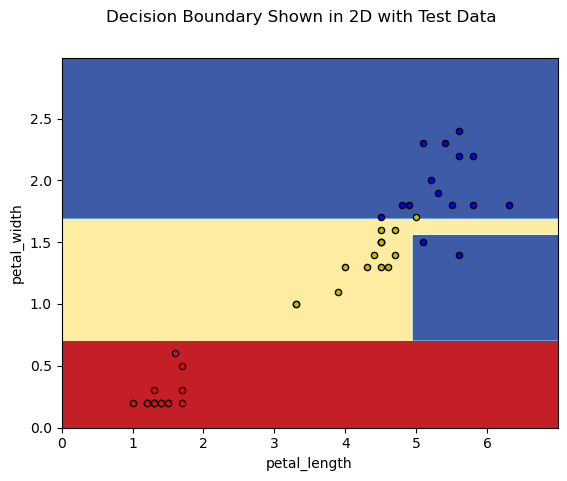

In [23]:
# plot decision boundary for pedal width vs pedal length
plot_step = 0.01
plot_colors = "ryb"
xx, yy = np.meshgrid(np.arange(0, 7, plot_step), np.arange(0, 3, plot_step))
plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)

selected_predictors = ["petal_length", "petal_width"]
mod_dt_1 = DecisionTreeClassifier(max_depth = 3, random_state = 1)
y_train_en = y_train.replace({'setosa':0,'versicolor':1,'virginica':2}).copy()
mod_dt_1.fit(X_train[selected_predictors],y_train_en)

pred_all = mod_dt_1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_all = pred_all.reshape(xx.shape)

graph = plt.contourf(xx, yy, pred_all, cmap=plt.cm.RdYlBu)

plt.xlabel(selected_predictors[0])
plt.ylabel(selected_predictors[1])

# plot test data points
n_class = 3
for i, color in zip(cn, plot_colors):
    temp = np.where(y_test == i)
    idx = [elem for elems in temp for elem in elems]
    plt.scatter(X_test.iloc[idx, 2], X_test.iloc[idx, 3], c=color, 
                label=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

plt.suptitle("Decision Boundary Shown in 2D with Test Data")
plt.axis("tight");

There are some points right on the boundary and that are the points that are challenging the Decision Tree and reduce the accuracy.  Because the dataset we are using is small, it is easy to see those points.  With larger datasets, there could be significant clusters on the boundary.  That's when it would be good to try Ramdom Forest.  Let's try that in our next Notebook 2.

## Please proceed to Notebook 2